## EDA for provider payments (utility) dataset

#### data is read in from psql

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import psycopg2 as pg2

In [2]:
conn = pg2.connect(dbname='medicare', user='postgres')
#cur = conn.cursor()

In [3]:
query = '''
        SELECT *
        FROM util_payments_agg_2013;
        '''

In [6]:
1+1

2

In [4]:
df_util = pd.read_sql_query(query, conn)

KeyboardInterrupt: 

In [7]:
df_fraud = pd.read_csv('/home/ubuntu/medicare-project/data/medical_label_certain.csv')

In [8]:
fraud_list = df_fraud['npi'].tolist()

In [9]:
df_util['fraud'] = [1 if col in fraud_list else 0 for col in df_util['npi']]

NameError: name 'df_util' is not defined

In [10]:
np.sum(df_util['fraud'])

NameError: name 'df_util' is not defined

### 22 of the fraud cases are in the utility payments dataset  
EDA on those cases

In [26]:
df_util_fraud = df_util[df_util['fraud']==1]

In [31]:
df_util_fraud.T

,11698,50268,118696,227414,278907,401832,407389,425797,427941,453157,...,512140,524376,660115,670118,721470,748820,789336,844347,864491,943061
index,11698,50268,118696,227414,278907,401832,407389,425797,427941,453157,...,512140,524376,660115,670118,721470,748820,789336,844347,864491,943061
npi,1013087741,1053354787,1124080163,1235308172,1295705291,1427000819,1427136043,1447300504,1447390067,1477571818,...,1538200308,1548427164,1689986945,1700040110,1750389698,1780661397,1821124041,1881664829,1902838014,1982753653
last_name,KALLINI,GOLDFEIN,PORRO,LIN,EZUKANMA,BINDER,QADIR,GLAZER,ROBINSON,ALAM,...,MEMAR,DANESHVAR,MUNOZ,SANDERS,ROBINSON,CALUB,MARTINEZ,ATAYA,OGBUOKIRI,FISCHER
first_name,ADEL,AARON,YAMILE,SOPHIA,NOBLE,WILLIAM,RIZWAN,ROBERT,PAUL,WASEEM,...,OMEED,GERALD,RICHELLE,CELESTINE,PAUL,JOSE,JESUS,HATEM,GODWIN,BARRY
middle_initial,A,S,B,V,U,J,None,A,M,None,...,None,None,Q,A,J,None,R,M,C,L
credentials,MD,M.D.,MD,D.C.,M.D.,M.D.,MD,MD,MD,MD,...,MD,M.D.,OTR/L,CSW,D.O.,MD,M.D.,MD,MD,M.D
gender,M,M,F,F,M,M,M,M,M,M,...,M,M,F,F,M,M,M,M,M,M
entity_code,I,I,I,I,I,I,I,I,I,I,...,I,I,I,I,I,I,I,I,I,I
street1,440 E SAMPLE RD,2040 MONROE ST,8260 W FLAGLER ST,379 OLD TOWN RD,8401 JACKSBORO HWY,200 ARNET ST,43138 DEQUINDRE RD,5250 SANTA MONICA BLVD,14069 MARQUESAS WAY,43344 WOODWARD AVE,...,50 E WASHINGTON ST STE 200,10005 JOSEPH CAMPAU ST,2231 E 4TH ST,124 PEARL ST,20700 LAKE CHABOT RD,2555 THE STRAND,9333 SW 152ND ST,611 COURT ST,4543 DOWNMAN RD,535 FAIRWAY DR
street2,SUITE 101,SUITE #209,SUITE 2-M,None,SUITE 218,SUITE 170,None,SUITE 208,SUITE 216D,None,...,None,None,None,SUITE 308,SUITE #107,None,None,None,None,None


In [32]:
df_util_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 11698 to 943061
Data columns (total 69 columns):
index                                       22 non-null int64
npi                                         22 non-null int64
last_name                                   22 non-null object
first_name                                  22 non-null object
middle_initial                              17 non-null object
credentials                                 22 non-null object
gender                                      22 non-null object
entity_code                                 22 non-null object
street1                                     22 non-null object
street2                                     11 non-null object
city                                        22 non-null object
zip                                         22 non-null object
state                                       22 non-null object
country                                     22 non-null object
provider_

In [39]:
hist_cols = ['num_hcpcs', 'num_services', 'num_unique_bene', 'total_submitted_charges', 'total_medicare_allowed_amt', 'total_medicare_payment_amt',
            'drug_suppress_indicator', 'num_hcpcs_associated_drug_srvc', 'num_drug_srvc',
            'num_unique_bene_with_drug_srvc', 'total_drug_submitted_charges', 'total_drug_medicare_allowed_amt',
            'total_drug_medicare_payment_amt', 'num_hcpcs_associated_med_srvc', 'num_med_srvc', 'num_unique_bene_with_med_srvc',
            'total_med_submitted_charges', 'total_med_medicare_allowed_amt', 'total_med_medicare_payment_amt', 'avg_age_bene']

In [14]:
df_util['services_bene_ratio'] = df_util['num_services'] / df_util['num_unique_bene']
df_util['submitted_charge_bene_ratio'] = df_util['total_submitted_charges'] / df_util['num_unique_bene']
df_util['medicare_allowed_bene_ratio'] = df_util['total_medicare_allowed_amt'] / df_util['num_unique_bene']
df_util['medicare_payment_bene_ratio'] = df_util['total_medicare_payment_amt'] / df_util['num_unique_bene']
df_util['payment_submitted_ratio'] = df_util['total_medicare_payment_amt'] / df_util['total_submitted_charges']

In [53]:
df_util.describe()

,index,npi,num_hcpcs,num_services,num_unique_bene,total_submitted_charges,total_medicare_allowed_amt,total_medicare_payment_amt,num_hcpcs_associated_drug_srvc,num_drug_srvc,...,pcnt_rheumatoid_arthritis_osteoarthirtis,pcnt_schizophrenia_psychotic,pcnt_stroke,avg_hcc_risk_score,fraud,services_bene_ratio,submitted_charge_bene_ratio,medicare_allowed_bene_ratio,medicare_payment_bene_ratio,payment_submitted_ratio
count,956293.000000,9.562930e+05,956293.000000,956293.000000,956293.000000,9.562930e+05,9.562930e+05,9.562930e+05,855508.000000,855508.000000,...,857849.000000,503777.000000,533130.000000,956293.000000,956293.000000,956293.000000,956293.000000,956293.000000,956293.000000,956293.000000
mean,478146.000000,1.499823e+09,33.547634,2637.226391,376.149360,3.316371e+05,1.216336e+05,9.331302e+04,2.035427,861.947316,...,43.716086,9.167078,8.427954,1.504424,0.000023,7.324371,1007.058090,384.012788,287.614593,0.369588
std,276058.154823,2.880216e+08,36.688200,37079.559334,2921.719269,2.225272e+06,6.138467e+05,5.568411e+05,5.711384,9206.432962,...,13.033305,12.168096,7.647463,0.713724,0.004796,65.408874,4112.865238,2142.488977,1680.364899,0.199910
min,0.000000,1.003000e+09,1.000000,11.000000,11.000000,5.200000e+01,2.090000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.309000,0.000000,0.487654,2.041975,0.104500,0.000000,0.000000
25%,239073.000000,1.245563e+09,9.000000,198.000000,67.000000,2.921100e+04,1.365331e+04,1.005876e+04,0.000000,0.000000,...,35.000000,2.000000,4.000000,1.027300,0.000000,1.764706,308.875116,137.591947,100.860556,0.225052
50%,478146.000000,1.497992e+09,22.000000,579.000000,177.000000,1.091662e+05,4.324796e+04,3.200653e+04,0.000000,0.000000,...,42.000000,6.000000,7.000000,1.317100,0.000000,2.863049,583.333333,237.904516,175.286757,0.336542
75%,717219.000000,1.750304e+09,45.000000,1695.000000,400.000000,3.126167e+05,1.187013e+05,8.902692e+04,2.000000,36.000000,...,50.000000,11.000000,12.000000,1.809200,0.000000,6.029484,1080.718213,422.458140,313.648541,0.473295
max,956292.000000,1.993000e+09,1110.000000,11968907.000000,1352762.000000,8.138554e+08,2.155981e+08,2.113041e+08,118.000000,1348986.000000,...,75.000000,75.000000,75.000000,12.184800,1.000000,48178.071429,2215349.768235,963374.371176,758323.585882,1.000000


In [52]:
df_util[df_util['fraud']==1].describe()

,index,npi,num_hcpcs,num_services,num_unique_bene,total_submitted_charges,total_medicare_allowed_amt,total_medicare_payment_amt,num_hcpcs_associated_drug_srvc,num_drug_srvc,...,pcnt_rheumatoid_arthritis_osteoarthirtis,pcnt_schizophrenia_psychotic,pcnt_stroke,avg_hcc_risk_score,fraud,services_bene_ratio,submitted_charge_bene_ratio,medicare_allowed_bene_ratio,medicare_payment_bene_ratio,payment_submitted_ratio
count,22.000000,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,19.000000,19.000000,...,22.000000,12.000000,14.000000,22.000000,22,22.000000,22.000000,22.000000,22.000000,22.000000
mean,504051.000000,1.527736e+09,31.818182,6770.886364,435.045455,589264.670455,355711.307727,269248.300455,2.736842,423.552632,...,61.363636,9.500000,9.642857,1.778914,1,13.984722,1278.783396,803.535279,598.362719,0.486468
std,261662.391452,2.723085e+08,28.530078,10693.342793,338.057121,568198.147469,329399.354655,251776.860300,4.432733,1057.599416,...,17.855359,3.942772,4.180672,0.538585,0,13.834763,764.656159,520.225176,354.385837,0.151136
min,11698.000000,1.013088e+09,1.000000,208.000000,48.000000,18055.000000,12354.090000,6535.310000,0.000000,0.000000,...,23.000000,1.000000,5.000000,0.904200,1,1.724518,282.109375,188.896391,102.114219,0.217139
25%,403221.250000,1.427035e+09,9.750000,1290.750000,195.250000,141712.750000,95602.062500,71615.932500,0.000000,0.000000,...,54.250000,7.750000,7.000000,1.492975,1,4.891707,718.549870,473.541261,357.695814,0.376104
50%,503874.500000,1.533080e+09,24.500000,3083.000000,344.500000,401131.510000,272037.365000,208933.910000,1.000000,42.000000,...,69.000000,10.000000,8.000000,1.676150,1,8.029154,1163.537987,730.944013,564.297777,0.499642
75%,708632.000000,1.737802e+09,37.500000,7244.000000,736.500000,931400.290000,545169.070000,416035.192500,4.000000,174.500000,...,75.000000,11.250000,12.000000,2.083225,1,15.925234,1427.747453,1039.084935,787.970728,0.546152
max,943061.000000,1.982754e+09,120.000000,50076.000000,1343.000000,2042695.000000,1342501.700000,1032256.600000,18.000000,4086.500000,...,75.000000,17.000000,20.000000,2.774700,1,57.164384,3428.522486,2570.980000,1651.128432,0.748672


In [56]:
df_util.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956293 entries, 0 to 956292
Data columns (total 74 columns):
index                                       956293 non-null int64
npi                                         956293 non-null int64
last_name                                   956275 non-null object
first_name                                  898288 non-null object
middle_initial                              678408 non-null object
credentials                                 873126 non-null object
gender                                      898293 non-null object
entity_code                                 956293 non-null object
street1                                     956291 non-null object
street2                                     392669 non-null object
city                                        956291 non-null object
zip                                         956293 non-null object
state                                       956293 non-null object
country             

## Attempt modeling

In [8]:
from sklearn.ensemble import IsolationForest
from sklearn.cross_validation import train_test_split
import pandas as pandas
import numpy as np


def make_train_test_dataset(data_df):
    """Returns train/test split dataframes.

    Parameters
    ----------
    data_df : pandas df
        Full dataframe

    Returns
    -------
    X_train, X_test
        split dataframe

    Examples
    --------
    """
    X_train, X_test = train_test_split(data_df, test_size=.5, random_state=13)

    return X_train, X_test


def fit_model(X_train, model_columns, bootstrap=False, max_features=1.0,
              max_samples='auto', n_estimators=100):
    """Returns fitted isolation forest model

    Parameters
    ----------
    X_train : pandas df
        Full dataframe of trainset
    model_columns : list of strings
        Column names to include in model

    Returns
    -------
    model
        trained isolation forest model

    Examples
    --------
    """
    model = IsolationForest(bootstrap=bootstrap, max_features=max_features,
                            max_samples=max_samples, n_estimators=n_estimators,
                            n_jobs=-1, random_state=13, verbose=True)
    model.fit(X_train[model_columns])

    return model


def prediction(test_df, model_columns, model):
    """Returns df of doctors/npi with outlier prediction.

    Parameters
    -----------
    test_df : pandas df
        Dataframe of test split
    model : isolation forest model
        Trained sklearn isolation forest model

    Returns
    ---------
    df : test data frame with prediction

    Examples
    --------
    """
    test_df['prediction'] = model.predict(test_df[model_columns])

    return test_df


def check_labels(label_df, test_df, model_columns):
    """Returns df of doctors/npi with indictment label.

    Parameters
    -----------
    label_df : pandas df
        Dataframe of doctors with indictments
    test_df : pandas df
        Dataframe of test split

    Returns
    ---------
    df : test data frame with label if found in label set

    Examples
    --------
    """
    test_df['indicted'] = [1 if row in list(label_df['npi'])
                           else 0 for row in test_df['npi']]

    return test_df

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [55]:
X_train, X_test = make_train_test_dataset(df_util)

In [16]:
model_columns = ['services_bene_ratio', 
                 'submitted_charge_bene_ratio',
                 'medicare_allowed_bene_ratio',
                 'medicare_payment_bene_ratio',
                 'payment_submitted_ratio',
                'fraud']

In [67]:
mod_iso = fit_model(X_train, model_columns)

[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   33.5s finished


In [68]:
X_test = prediction(X_test, model_columns, mod_iso)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [69]:
X_test[['fraud', 'prediction']][X_test['fraud']==1]

,fraud,prediction
660115,1,0.570063
425797,1,0.450838
512140,1,0.469843
453157,1,0.501565
721470,1,0.491821
748820,1,0.491269
401832,1,0.405945
118696,1,0.398292
11698,1,0.470492
864491,1,0.379218


In [14]:
956293 - 100785

855508

In [15]:
# To explain the counts in the charge columns: total entries = 956293, suppress = 100785, difference is 855508 

## Plot to visualize frauds

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [82]:
X_plot, X_no_plot = train_test_split(X_test[model_columns][X_test['fraud']==0], test_size=.995)

In [83]:
X_plot.shape

(2390, 3)

In [84]:
scale = StandardScaler()

In [85]:
X_plot_scale = scale.fit_transform(X_plot[model_columns])

In [87]:
X_plot_fraud_scale = scale.transform(X_test[model_columns][X_test['fraud']==1])

In [88]:
xs = X_plot_scale[:,0]
ys = X_plot_scale[:,1]
zs = X_plot_scale[:,2]

In [89]:
xt = X_plot_fraud_scale[:,0]
yt = X_plot_fraud_scale[:,1]
zt = X_plot_fraud_scale[:,2]

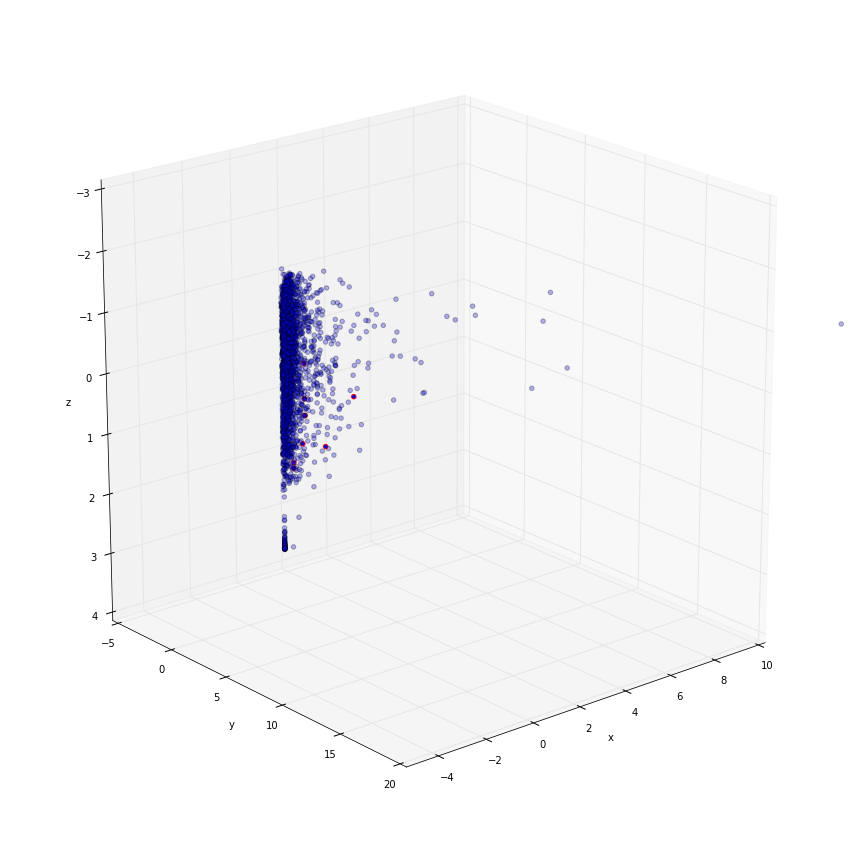

In [113]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#plt.figure(figsize=(15,15))
ax.set_xlim(-5,10)
#ax.set_ylim(-1000000,8000000)
#ax.set_zlim(-3000000,3000000)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(xs, ys, zs, alpha=.3)
ax.scatter(xt, yt, zt, alpha=1, color='r')
ax.view_init(200, -50)
plt.show()

## Seaborns plotting

In [11]:
import seaborn as sns

In [12]:
sns.set()

In [21]:
#scale = StandardScaler()
#df_util_plot = scale.fit_transform(df_util[model_columns])


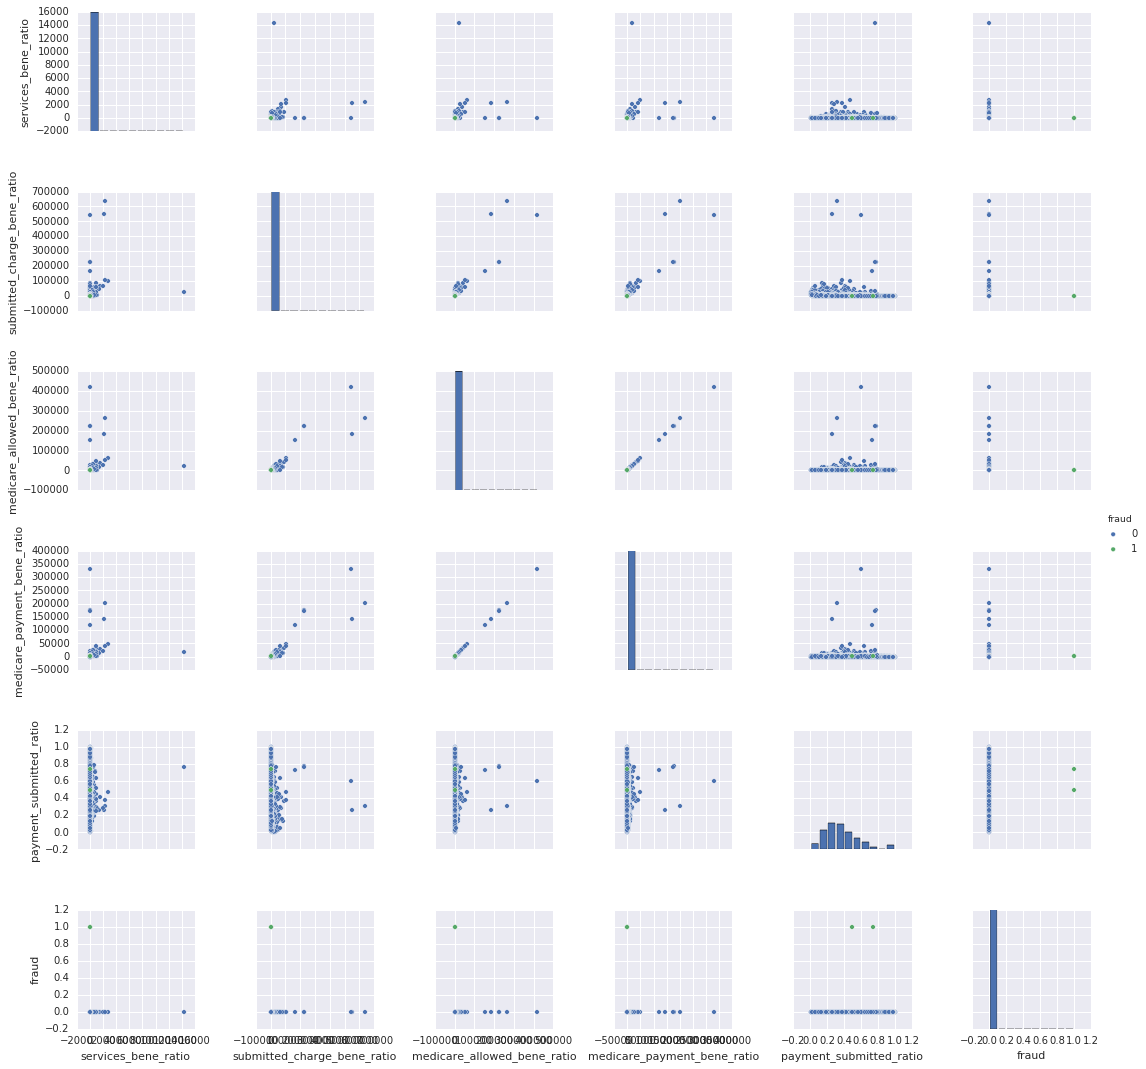

In [26]:
df2_sample = df_util[model_columns].sample(100000)
sns.set()
sns.pairplot(df2_sample, hue='fraud')

In [ ]:
sns.lmplot('pressure', 'temp', hue='label', data=df2_sample, fit_reg=False)

In [12]:
len(df_util['provider_type'].value_counts())

90

In [13]:
df_util['provider_type'].value_counts()

Internal Medicine                           95656
Family Practice                             81187
Nurse Practitioner                          64696
Physician Assistant                         50125
Emergency Medicine                          39285
Physical Therapist                          39265
CRNA                                        37870
Chiropractic                                37061
Anesthesiology                              36535
Diagnostic Radiology                        29337
Mass Immunization Roster Biller             28782
Optometry                                   27900
Obstetrics/Gynecology                       27771
Cardiology                                  22782
Psychiatry                                  22709
Orthopedic Surgery                          21204
General Surgery                             19862
Ophthalmology                               17550
Licensed Clinical Social Worker             15360
Podiatry                                    14789


In [17]:
df_util[['num_unique_bene', 'num_bene_le65', 'num_bene_65to74', 'num_bene_75to84', 'num_bene_ge84']]

,num_unique_bene,num_bene_le65,num_bene_65to74,num_bene_75to84,num_bene_ge84
0,665,120,186,205,154
1,3940,100,1669,1472,699
2,144,76,36,20,12
3,436,65,97,137,137
4,63,35,13,NaN,NaN
5,146,60,56,NaN,NaN
6,539,28,161,193,157
7,306,58,134,73,41
8,14,NaN,NaN,0,0
9,41,NaN,25,NaN,NaN


### Nulls in beneficiary age counts due to counts being less than 11
#### Impute with number missing / number of nulls

### Explore male/female data

In [18]:
df_util[['num_unique_bene', 'num_female', 'num_male']]

,num_unique_bene,num_female,num_male
0,665,359,306
1,3940,2025,1915
2,144,72,72
3,436,265,171
4,63,63,0
5,146,80,66
6,539,310,229
7,306,168,138
8,14,NaN,NaN
9,41,30,11


In [22]:
np.sum(df_util['num_male'])/np.sum(df_util['num_female'])

0.7193915367560691

#### Ratio of male: female is .72. Impute missings on that ratio. (except for female specific doctors? obgyn, etc...)

### Explore Race nulls

```
num_non_his_white                           629147 non-null float64   
num_african_american                        319244 non-null float64  
num_asian                                   165528 non-null float64  
num_hispanic                                250582 non-null float64  
num_american_indian                         263435 non-null float64  
num_no_race                                 126199 non-null float64
```

In [23]:
df_util[['num_unique_bene', 'num_non_his_white', 'num_african_american', 'num_asian', 'num_hispanic', 'num_american_indian', 'num_no_race']]

,num_unique_bene,num_non_his_white,num_african_american,num_asian,num_hispanic,num_american_indian,num_no_race
0,665,639,14,NaN,NaN,0,NaN
1,3940,3736,53,41,71,0,39
2,144,109,NaN,NaN,NaN,NaN,NaN
3,436,NaN,NaN,NaN,NaN,NaN,NaN
4,63,NaN,NaN,NaN,NaN,NaN,NaN
5,146,100,NaN,NaN,23,NaN,NaN
6,539,495,22,NaN,NaN,NaN,NaN
7,306,295,NaN,NaN,NaN,0,NaN
8,14,NaN,NaN,NaN,NaN,NaN,NaN
9,41,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
race_list = ['num_unique_bene', 'num_non_his_white', 'num_african_american', \
             'num_asian', 'num_hispanic', 'num_american_indian', 'num_no_race']

In [32]:
for n in race_list:
    race_count = np.sum(df_util[n])
    print n
    print 'total count:', race_count
    print 'percentage: ', race_count / np.sum(df_util['num_unique_bene'])

num_unique_bene
total count: 359709000
percentage:  1
num_non_his_white
total count: 263081956.0
percentage:  0.731374405422
num_african_american
total count: 29924440.0
percentage:  0.0831906902524
num_asian
total count: 4969493.0
percentage:  0.0138153146015
num_hispanic
total count: 16212778.0
percentage:  0.0450719275859
num_american_indian
total count: 928858.0
percentage:  0.00258224842859
num_no_race
total count: 1500853.0
percentage:  0.00417240880823


#### Higher number of minorities missing from data b/c they're more likely to be lower in numbers and therefore represented as null (only null if < 11). Impute missing with overall population frequency?
#### Also possible that minorities aren't on medicare for some other reason

## Explore disease percentage nulls

```
pcnt_alzheimers_dementia                    633056 non-null float64
pcnt_asthma                                 603736 non-null float64
pcnt_artrial_fibrillation                   650309 non-null float64
pcnt_cancer                                 646550 non-null float64
pcnt_chronic_kidney                         752279 non-null float64
pcnt_chronic_obstructive_pulmonary          699972 non-null float64
pcnt_depression                             800406 non-null float64
pcnt_diabetes                               822613 non-null float64
pcnt_heart_failure                          721405 non-null float64
pcnt_hyperlipidemia                         886581 non-null float64
pcnt_hypertension                           906330 non-null float64
pcnt_ischemic_heart                         819432 non-null float64
pcnt_osteoporosis                           604753 non-null float64
pcnt_rheumatoid_arthritis_osteoarthirtis    857849 non-null float64
pcnt_schizophrenia_psychotic                503777 non-null float64
pcnt_stroke                                 533130 non-null float64
```

In [58]:
disease_list = df_util.columns[-17:-1]

In [56]:
type(disease_list)

pandas.core.index.Index

In [61]:
pd.concat([df_util['num_unique_bene'],df_util[disease_list]], axis=1)

,num_unique_bene,pcnt_alzheimers_dementia,pcnt_asthma,pcnt_artrial_fibrillation,pcnt_cancer,pcnt_chronic_kidney,pcnt_chronic_obstructive_pulmonary,pcnt_depression,pcnt_diabetes,pcnt_heart_failure,pcnt_hyperlipidemia,pcnt_hypertension,pcnt_ischemic_heart,pcnt_osteoporosis,pcnt_rheumatoid_arthritis_osteoarthirtis,pcnt_schizophrenia_psychotic,pcnt_stroke
0,665,32,13,26,16,56,41,38,54,50,70,75,67,13,47,16,20
1,3940,8,4,12,13,14,8,11,20,11,57,60,29,8,36,1,4
2,144,11,13,NaN,8,22,23,57,51,19,53,72,40,NaN,74,NaN,NaN
3,436,30,11,23,14,51,44,43,43,50,61,75,59,17,38,17,10
4,63,NaN,NaN,NaN,NaN,NaN,NaN,41,30,NaN,43,57,22,NaN,30,NaN,0
5,146,8,12,10,18,40,24,41,40,18,49,75,34,11,40,NaN,NaN
6,539,38,3,14,14,25,21,12,31,18,75,73,41,13,53,NaN,4
7,306,9,5,8,10,13,9,17,24,10,62,67,30,12,27,NaN,NaN
8,14,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,66,NaN,NaN,37,NaN,NaN


#### Nulls result from raw count being less than 11, might be hard to impute because there's a lot of missing and it doesn't necessarily add to 1

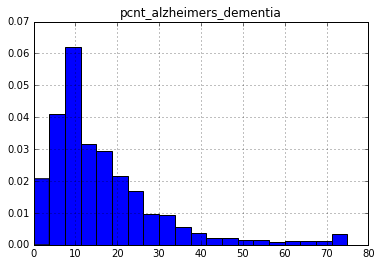

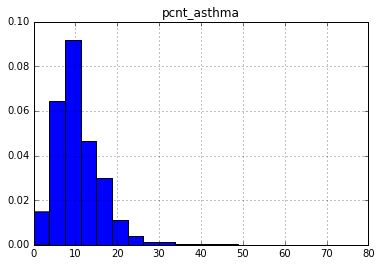

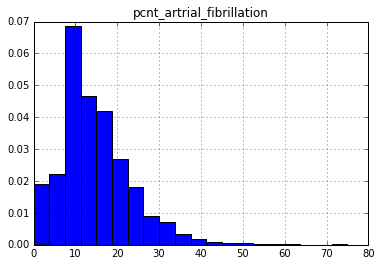

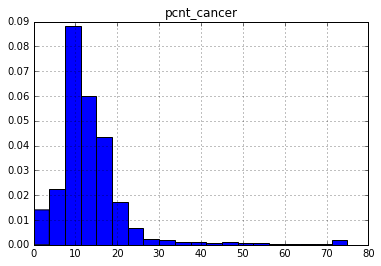

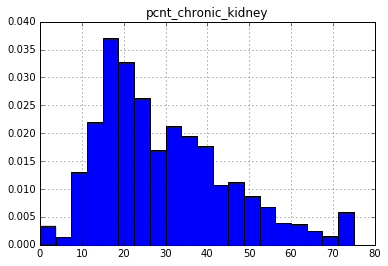

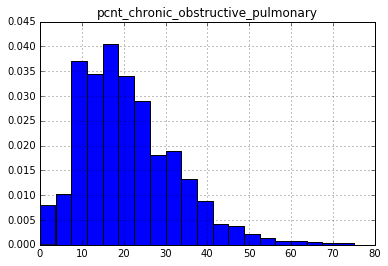

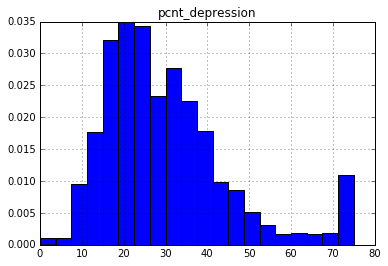

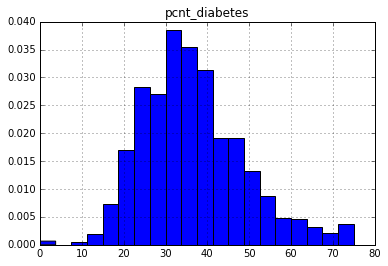

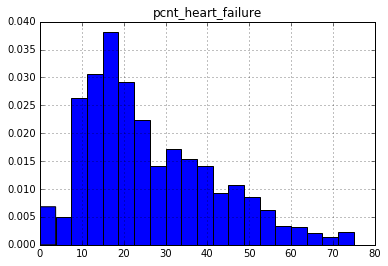

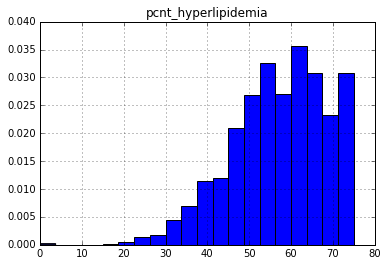

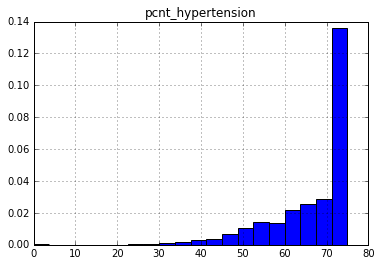

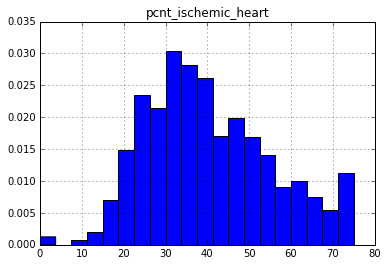

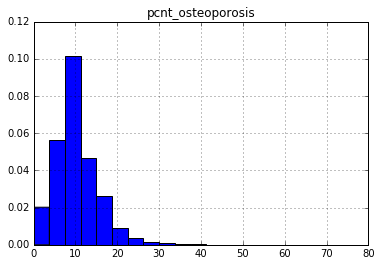

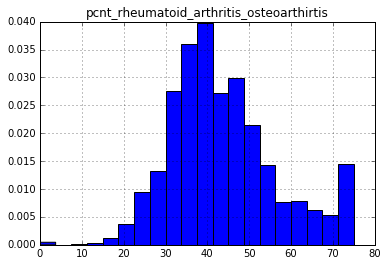

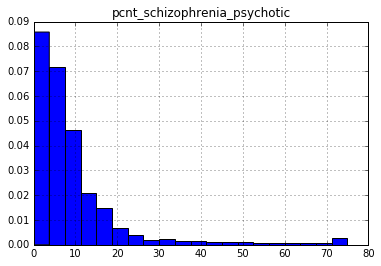

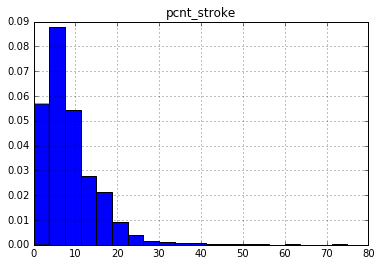

In [74]:
for n in disease_list:
    df_util[n].hist(bins=20, normed=True)
    plt.title(n)
    plt.show()